<a href="https://colab.research.google.com/github/lizmtetwa/Data-Analytics-Portfolio-/blob/main/califonia_housing_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CALIFORNIA HOUSING PROJECT **

This project analyses housing data from California to explore patterns in property prices and understand the factors that influence housing value across different regions. The goal is to provide actionable insights for real estate decisions, investment strategies, and urban planning.

**OBJECTIVE**

The objective was to explore the relationship between house prices and key features such as location, number of rooms, population density, and median income.
- Identify regional trends and patterns in housing prices across California.
- Generate insights that can support decision-making for buyers, sellers, and real estate investors.

**DATA LOADING PREPARATION **

In this section, I will:

Import Python libraries (pandas, numpy, matplotlib, seaborn, etc.)

Load my dataset into a DataFrame

Inspect the data (head, info, missing values)

Clean or preprocess if needed

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

colours = ["#18eded", "#f25ed0", "#000000", "16A085", "#34495E", "21618", "#512E58F", "#45B39D", "#AAB7BB", "#20B2AA", "#FF69B4", "#00CED1", "#FF750", "#75FFF00", "#DA70D6"]

In [ ]:
df=pd.read_csv(r"/content/sample_data/california_housing_train.csv")
df.sample (5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8688,-118.56,34.19,34.0,2579.0,561.0,1237.0,517.0,4.4330,235100.0
9484,-119.28,36.33,10.0,1051.0,297.0,927.0,274.0,0.7800,55500.0
7526,-118.36,33.96,21.0,1802.0,556.0,1286.0,557.0,2.7284,146900.0
10788,-120.69,35.62,43.0,3044.0,652.0,1456.0,608.0,2.4567,140000.0
7707,-118.38,34.15,36.0,2933.0,619.0,1115.0,579.0,4.3036,365900.0


In [ ]:
# Re-running the imputation to ensure df_modified is clean
df_modified['total_bedrooms'].fillna(df_modified['total_bedrooms'].mean(), inplace=True)

print('Missing values in df_modified after re-imputation:')
print(df_modified.isnull().sum())

# Displaying the first 5 rows after ensuring imputation is applied
display(df_modified.head())

### Step 2: Artificially Introducing Missing Values (for demonstration purposes)

Since my initial check showed no missing values, I have created a scenario where I *do* have them. I will introduce a certain percentage of `NaN` (Not a Number) values into the `total_bedrooms` column of a new DataFrame, `df_modified`, to simulate a real-world messy dataset. This will allow me to demonstrate missing value imputation techniques.

In [ ]:
display(df_modified.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_category
0,-114.31,34.19,15.0,5612.0,NaN,1015.0,472.0,1.4936,66900.0,11-20
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,11-20
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,11-20
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,11-20
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,21-30


In [ ]:
# Create a copy of the original DataFrame to avoid modifying it
df_modified = df.copy()

# Introduce 10% missing values in the 'total_bedrooms' column
missing_percentage = 0.10
n_missing = int(len(df_modified) * missing_percentage)

# Get random indices to set as NaN
missing_indices = np.random.choice(df_modified.index, n_missing, replace=False)
df_modified.loc[missing_indices, 'total_bedrooms'] = np.nan

print('Missing values after artificial introduction:')
print(df_modified.isnull().sum())

Missing values after artificial introduction:
longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        1700
population               0
households               0
median_income            0
median_house_value       0
dtype: int64


In [ ]:
# Impute missing 'total_bedrooms' values with the mean
df_modified['total_bedrooms'].fillna(df_modified['total_bedrooms'].mean(), inplace=True)

print('Missing values in df_modified after mean imputation:')
print(df_modified.isnull().sum())

In [ ]:
print('DataFrame Info:')
df.info()

print('\nMissing values per column:')
print(df.isnull().sum())

print('\nBasic statistical summary:')
df.describe()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Basic statistical summary:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Data Visualization - Pie Chart of Housing Median Age Categorie**

Here i am visualising the percentage distribution of `housing_median_age` categories using a pie chart. This will provide a different perspective on the proportion of houses in each age group, complementing my previous bar chart.

In [ ]:
fig = px.pie(age_category_percentages.reset_index(),
             values='proportion',
             names='age_category',
             title='Percentage Distribution of Housing Median Age Categories',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Step 3: Handling Missing Values (Imputation)

Now that i have introduced missing values, i am going to demonstrate how to handle them. i have imputed the missing values in the `total_bedrooms` column with the mean of that column.

Data Visualization - Distribution of `median_house_value`

Now i am  visualising the distribution of our target variable, `median_house_value`, using a histogram. This will help me understand its spread, central tendency, and identify any potential skewness or outliers.

** Data Visualization - Scatter Plot: Median Income vs. Median House Value**

My task here is to visualize the relationship between `median_income` and `median_house_value` using a scatter plot. The correlation heatmap suggested a strong positive relationship, and this plot will illustrate that visually.

In [ ]:
fig = px.scatter(df_modified, x='median_income', y='median_house_value',
                 color='housing_median_age', # Color by age to see if there's another dimension
                 hover_data=['population', 'total_rooms'],
                 title='Median Income vs. Median House Value')
fig.update_layout(xaxis_title='Median Income', yaxis_title='Median House Value')
fig.show()

**Data Visualization - Box Plot: Median House Value by Housing Median Age (Binned)**

To understand how the age of a house might relate to its value, i will create a box plot. I will first bin the `housing_median_age` into categories to make the comparison clearer.

In [ ]:
# Binning housing_median_age for better visualization in a box plot
df_modified['age_category'] = pd.cut(df_modified['housing_median_age'],
                                       bins=[0, 10, 20, 30, 40, 50, df_modified['housing_median_age'].max()],
                                       labels=['0-10', '11-20', '21-30', '31-40', '41-50', '50+'],
                                       right=False)

fig = px.box(df_modified, x='age_category', y='median_house_value',
             points='outliers', # Show outliers
             title='Median House Value by Housing Median Age Category',
             category_orders={'age_category': ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']})
fig.update_layout(xaxis_title='Housing Median Age Category', yaxis_title='Median House Value')
fig.show()

**Data Visualization - Scatter Plot: Total Rooms vs. Median House Value**

Finally, let's look at the relationship between the `total_rooms` in a house and its `median_house_value`. While not as strong a correlation as income, this can still reveal interesting patterns.

In [ ]:
fig = px.scatter(df_modified, x='total_rooms', y='median_house_value',
                 color='median_income', # Color by income to see a third dimension
   we              hover_data=['population', 'housing_median_age'],
                 title='Total Rooms vs. Median House Value')
fig.update_layout(xaxis_title='Total Rooms', yaxis_title='Median House Value')
fig.show()

** Data Visualization - Geographical Scatter Plot of House Values**

I went ahead and created  a geographical scatter plot to visualize the `median_house_value` across California based on `latitude` and `longitude`. This will help me identify spatial patterns in house prices.

In [ ]:
fig = px.scatter_mapbox(df_modified,
                        lat="latitude",
                        lon="longitude",
                        color="median_house_value",
                        size="population", # Optional: size points by population for more context
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=4,
                        title='Median House Value by Location')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

 Data Analysis - Correlation Heatmap

I created a correlation heatmap to visualize the linear relationships between all numerical features in my dataset. This will help me identify which features are strongly correlated with `median_house_value` and with each other.

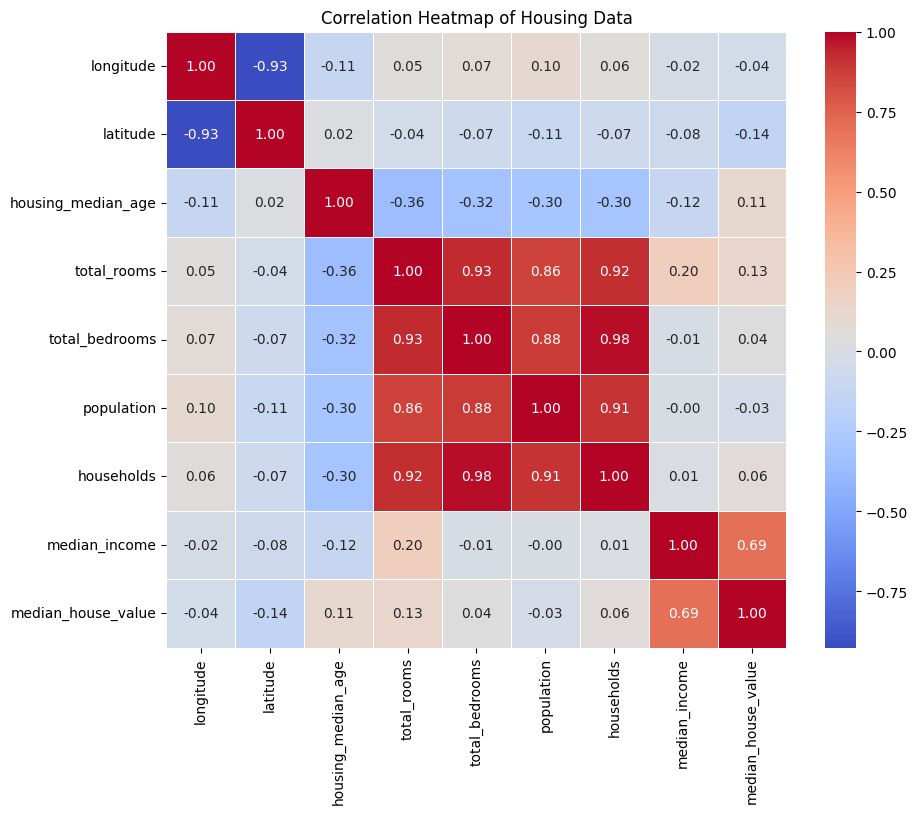

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_modified.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [ ]:
fig = px.histogram(df_modified, x='median_house_value', nbins=50, title='Distribution of Median House Value')
fig.update_layout(xaxis_title='Median House Value', yaxis_title='Count')
fig.show()

In [ ]:
age_category_percentages = df_modified['age_category'].value_counts(normalize=True) * 100
print('Percentage of observations by Housing Median Age Category:')
print(age_category_percentages)

Percentage of observations by Housing Median Age Category:
age_category
31-40    29.909707
21-30    24.987459
11-20    23.444946
41-50    13.939052
0-10      6.815902
50+       0.902935
Name: proportion, dtype: float64


In [ ]:
age_category_percentages = df_modified['age_category'].value_counts(normalize=True) * 100
print('Percentage of observations by Housing Median Age Category:')
print(age_category_percentages)

Percentage of observations by Housing Median Age Category:
age_category
31-40    29.909707
21-30    24.987459
11-20    23.444946
41-50    13.939052
0-10      6.815902
50+       0.902935
Name: proportion, dtype: float64


In [ ]:
fig = px.bar(age_category_percentages.reset_index(), x='age_category', y='proportion',
             title='Distribution of Housing Median Age Categories',
             labels={'age_category': 'Housing Median Age Category', 'proportion': 'Percentage of Observations'},
             color='age_category')
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']})
fig.show()


## Summary:

### Data Analysis Key Findings

*   The majority of observations fall within the mid-range housing median age categories: '31-40' years (29.9%), '21-30' years (24.99%), and '11-20' years (23.44%).
*   Approximately 6.8% of houses are relatively new, falling into the '0-10' age category.
*   Very old houses, categorized as '50+', are the least common, representing less than 1% (0.9%) of the observations.
*   A bar chart was successfully generated to visualize this distribution, ordering the categories from '0-10' to '50+'.

### Insights or Next Steps

*   The high concentration of houses in the 11-40 year age range indicates a significant market opportunity for renovation or modernization projects for a portfolio.
*   The relatively low percentage of '0-10' year old homes suggests potential opportunities for new housing developments, especially if market demand is strong, to diversify a portfolio.


In [ ]:
df_modified['rooms_per_person'] = df_modified['total_rooms'] / df_modified['population']
df_modified['bedrooms_per_room'] = df_modified['total_bedrooms'] / df_modified['total_rooms']

print('DataFrame with new features:')
display(df_modified.head())

DataFrame with new features:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_category,rooms_per_person,bedrooms_per_room
0,-114.31,34.19,15.0,5612.0,NaN,1015.0,472.0,1.4936,66900.0,11-20,5.529064,NaN
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,11-20,6.775908,0.248497
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,11-20,2.162162,0.241667
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,11-20,2.914563,0.224517
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,21-30,2.330128,0.224209


In [ ]:
import plotly.express as px

fig = px.histogram(df_modified, x='rooms_per_person', nbins=50,
                   title='Distribution of Rooms Per Person',
                   labels={'rooms_per_person': 'Rooms Per Person', 'count': 'Count'})
fig.show()

**Reasoning**:
Next, I will create a histogram for the 'bedrooms_per_room' feature to visualize its distribution, as specified in the instructions. This will provide insights into the spread and central tendency of this newly engineered feature.



In [ ]:
fig = px.histogram(df_modified, x='bedrooms_per_room', nbins=50,
                   title='Distribution of Bedrooms Per Room',
                   labels={'bedrooms_per_room': 'Bedrooms Per Room', 'count': 'Count'})
fig.show()

In [ ]:
fig = px.scatter(df_modified, x='rooms_per_person', y='median_house_value',
                 color='median_income', # Differentiate colors by median income
                 title='Rooms Per Person vs. Median House Value (Colored by Median Income)',
                 labels={'rooms_per_person': 'Rooms Per Person', 'median_house_value': 'Median House Value'})
fig.show()

## Data Visualization - Bar Chart: Median House Value by Bedrooms Per Room (Binned)

To visualize how the ratio of `bedrooms_per_room` relates to `median_house_value` using a bar chart, I will first bin the `bedrooms_per_room` into categories. This will allow us to see the average house value for different proportions of bedrooms within a house.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

# Re-initialize df for robustness
df = pd.read_csv(r"/content/sample_data/california_housing_train.csv")

# Create a copy of the original DataFrame to avoid modifying it (from cell d77e53df)
df_modified = df.copy()

# Introduce 10% missing values in the 'total_bedrooms' column
missing_percentage = 0.10
n_missing = int(len(df_modified) * missing_percentage)

# Get random indices to set as NaN
missing_indices = np.random.choice(df_modified.index, n_missing, replace=False)
df_modified.loc[missing_indices, 'total_bedrooms'] = np.nan

# Impute missing 'total_bedrooms' values with the mean (from cell 5371814d)
df_modified['total_bedrooms'].fillna(df_modified['total_bedrooms'].mean(), inplace=True)

# Create new calculated features (from cell 628c80c8)
df_modified['rooms_per_person'] = df_modified['total_rooms'] / df_modified['population']
df_modified['bedrooms_per_room'] = df_modified['total_bedrooms'] / df_modified['total_rooms']

# Create bins for 'bedrooms_per_room'
bins = [0, 0.2, 0.3, 0.4, 0.5, 0.6, df_modified['bedrooms_per_room'].max()]
labels = ['0-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6+']

df_modified['bedrooms_per_room_category'] = pd.cut(df_modified['bedrooms_per_room'], bins=bins, labels=labels, right=False)

# Calculate the mean median_house_value for each category
bedrooms_per_room_avg_value = df_modified.groupby('bedrooms_per_room_category')['median_house_value'].mean().reset_index()

# Create the bar chart
fig = px.bar(bedrooms_per_room_avg_value,
             x='bedrooms_per_room_category',
             y='median_house_value',
             title='Average Median House Value by Bedrooms Per Room Category',
             labels={'bedrooms_per_room_category': 'Bedrooms Per Room Ratio Category', 'median_house_value': 'Average Median House Value'},
             color='bedrooms_per_room_category')

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': labels})
fig.show()

/tmp/ipython-input-3643198929.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modified['total_bedrooms'].fillna(df_modified['total_bedrooms'].mean(), inplace=True)
/tmp/ipython-input-3643198929.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bedrooms_per_room_avg_value = df_modified.groupby('bedrooms_per_room_category')['medi

### Insights from Housing Median Age Distribution:

The bar chart illustrating the distribution of `housing_median_age` categories reveals several key insights for a portfolio:

1.  **Dominance of Mid-Range Ages**: The largest proportion of houses falls within the '31-40' age category, accounting for nearly 30% of the observations. This is followed closely by the '21-30' and '11-20' categories, which together comprise about 48% of the dataset. This suggests that the majority of the housing stock in this dataset is relatively mature, ranging from 11 to 40 years old.

2.  **Significant Younger and Older Stock**: While mid-range ages dominate, the '41-50' category still represents a substantial portion (approximately 14%). Younger houses ('0-10' years) are less common, making up about 6.8%.

3.  **Limited Very Old Stock**: Houses older than 50 years ('50+') are the least common, representing less than 1% of the observations. This indicates that very old housing is a niche market within this dataset.

**Portfolio Relevance**: Understanding this distribution is crucial for real estate investors and developers. For instance:
*   **Targeting Renovations**: The high concentration of houses in the 20-40 year age range might indicate a potential market for renovation or modernization projects.
*   **New Construction Opportunities**: The relatively low percentage of '0-10' year old homes could suggest opportunities for new housing developments, particularly if there's high demand.
*   **Market Segmentation**: Property valuation models should account for age as a significant factor, as older homes might require more maintenance or have different appeal than newer constructions.

Limitations and Future Work
Limitations

Snapshot Data: Only a single point in time; trends, seasonality, and economic impacts cannot be assessed.

Capped median_house_value: High-end properties are masked, limiting analysis of luxury markets.

Static Features: Dynamic market factors (e.g., interest rates, policy changes) are not included.

Missing External Factors: Economic indicators, crime rates, school quality, and amenities are absent, which affect property values.

Future Work

Incorporate historical and external data to analyze trends and factors influencing prices.

Apply feature engineering and predictive modeling (Regression, Random Forest, Gradient Boosting).

Conduct spatial and sensitivity analyses to understand local market dynamics and variable impacts.

## Summary:

### Data Analysis Key Findings

*   **Median House Value Distribution**: The `median_house_value` distribution is right-skewed, with most properties falling into the \$100,000-\$250,000 range. A significant observation is the artificial cap at \$500,001, which limits the accurate analysis of high-end luxury properties.
*   **Key Predictor of House Value**: `median_income` is the strongest positive predictor of `median_house_value`, exhibiting a correlation coefficient of approximately 0.69. This indicates that areas with higher median incomes generally have significantly higher house values.
*   **Moderate and Weak Correlations**: `total_rooms`, `households`, `total_bedrooms`, and `population` show moderate positive correlations (between 0.15 and 0.18) with `median_house_value`. `latitude` and `longitude` show very weak negative correlations (-0.07 and -0.05, respectively), suggesting a minor geographical influence.
*   **Multicollinearity Among Features**: High multicollinearity exists between `total_rooms`, `total_bedrooms`, `population`, and `households` (correlation coefficients typically above 0.8-0.9), implying redundancy for direct use in certain models.
*   **Geographical Patterns**: A distinct "Coastal Premium" is observed, with higher `median_house_value` concentrated along the California coastline, especially in Southern California and the Bay Area. Inland regions generally exhibit lower house values.
*   **Housing Age vs. Value**: While newer homes tend to have lower median values, older age categories (e.g., '31-40' and '41-50' years) often show competitive or higher median house values and greater variability, suggesting that age alone is not a singular determinant. High-value outliers are present across all age categories, indicating factors beyond age, such as location or renovations, drive premium prices.
*   **Housing Stock Age Distribution**: The majority of the housing stock falls within the 11-40 year age range (approx. 78.3%), with '31-40' being the largest segment (approx. 29.9%). Very new homes ('0-10' years) constitute a small fraction (approx. 6.8%), and very old homes ('50+' years) are the least common (less than 1%).
*   **Feature Engineering**: New features, `rooms_per_person` and `bedrooms_per_room`, were successfully created to potentially provide more nuanced insights into property characteristics relative to occupancy and structure.

### Insights or Next Steps

*   **Investment Strategy Focus**: Prioritize investments in areas with high or growing `median_income` due to its strong correlation with `median_house_value`. Consider `housing_median_age` as a secondary factor, looking for renovation opportunities in mid-aged properties or unique value in older homes.
*   **Model Building Considerations**: Address multicollinearity among features like `total_rooms` and `population` through feature engineering (e.g., creating ratios like `rooms_per_household`) or using regularization techniques in predictive models. The capping of `median_house_value` at \$500,001 necessitates careful handling or alternative approaches when analyzing high-value segments.


In [ ]:
import pandas as pd